In [1]:
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
import plotly.express as px
init_notebook_mode(connected=True)

In [2]:
df_data = pd.read_csv('moore.csv',header=None,sep = '\t')
df_data.head()

,0,1,2,3,4,5
0,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²


In [3]:
def return_digits(x):
    num = ''
    for s in x:
        if s.isdigit():
            num = num + s
    return np.int64(num)
            

Y = df_data.iloc[:,1].apply(lambda x:x.split('[')[0].replace(',',''))
Y = Y.apply(lambda x: return_digits(x))
X = df_data.iloc[:,2].apply(lambda x:x.split('[')[0])
X = X.apply(lambda y:return_digits(y))
print(X.values,Y.values)


[1971 1972 1974 1974 1974 1974 1975 1976 1976 1978 1978 1979 1979 1981
 1982 1982 1983 1984 1985 1985 1985 1986 1987 1988 1988 1989 1989 1991
 1991 1993 1994 1995 1995 1996 1997 1997 1998 1999 1999 1999 1999 1999
 2000 2000 2001 2002 2002 2003 2003 2003 2004 2004 2005 2005 2006 2006
 2006 2006 2006 2007 2007 2007 2007 2007 2008 2008 2008 2008 2008 2009
 2010 2010 2010 2010 2010 2010 2011 2011 2011 2012 2012 2012 2012 2012
 2012 2012 2013 2013 2013 2013 2014 2014 2014 2014 2014 2014 2015 2015
 2015 2015 2015 2016] [       2300        3500        4500        4100        5000        8000
        3510        6500        8500       29000        9000       29000
       68000       11500       55000      134000       22000      190000
       25000      275000       16000       30000      553000      180000
      250000      300000     1180235       35000     1350000     3100000
      578977     5500000     2500000     4300000     8800000     7500000
     7500000    21300000    22000000      1

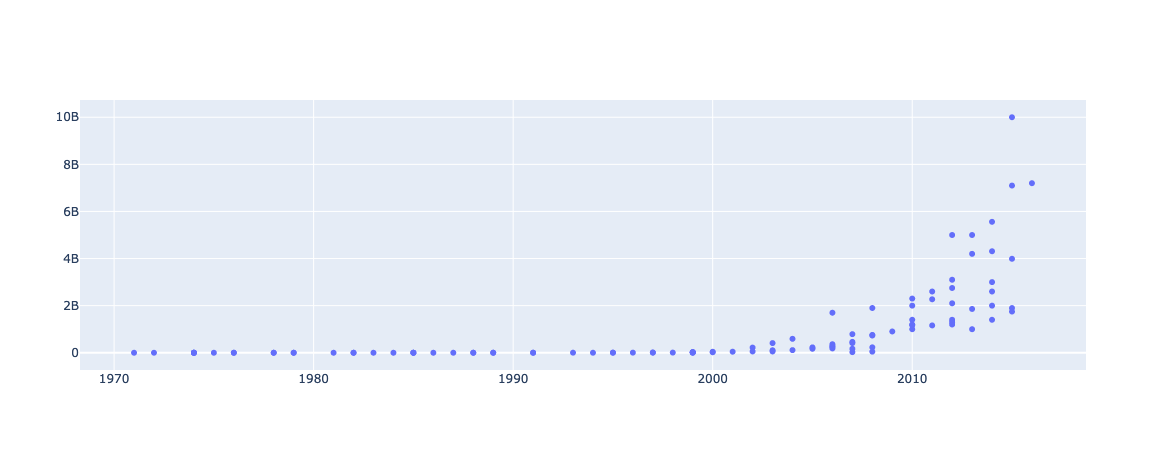

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X,y=Y,mode='markers'))
fig.show()

In [5]:
#X = np.log(X)
Y = np.log(Y)
denominator = np.sum(X**2) - np.mean(X)*np.sum(X)
a = (np.sum(np.dot(Y,X)) - np.mean(Y) * np.sum(X))/denominator
b = (np.sum(X**2) * np.mean(Y) - np.mean(X) * (np.sum(np.dot(Y,X)))) /denominator
print(a,b)
Y_hat = a*X + b

0.35104357336509945 -685.000284381872


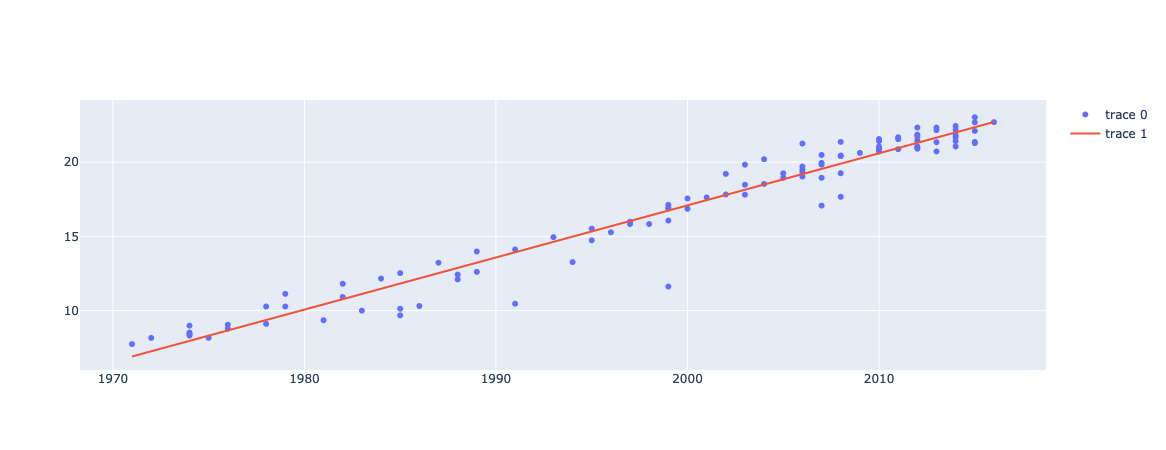

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=X,y=Y,mode='markers'))
fig.add_trace(go.Scatter(x=X,y=Y_hat,mode = 'lines'))
fig.show()


In [7]:
ss_res = np.sum((Y - Y_hat)**2)
ss_tot = np.sum((Y - np.mean(Y))**2)
r_squared = 1 - (ss_res/ss_tot)
print('R squared : ', r_squared)

R squared :  0.9529442852285764


In [8]:
print('Time to double {:2f} years'.format(np.log(2)/a))

Time to double 1.974533 years
